<a href="https://colab.research.google.com/github/Gugo-le/school_record_/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url=url, filename=file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300), # 이미지의 크기
        batch_size=128,
        class_mode='binary') # 레이블 종류를 지정:: 이미지가 두 개인 경우 binary이고 두 개 이상일 경우 categorical로 지정합니다.

Found 1027 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', # 3*3 크기의 필터 16개를 사용하고 입력 이미지 크기는 (300, 300, 3)입니다. 컬러 이미지이므로 채널이 3개입니다.
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # 하나의 뉴런, 이진 분류기를 만들 때 하나의 뉴런 출력을 시그모이드 함수로 활성화하면 이진 분류를 얻을 수 있음.
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [7]:
model.fit(train_generator, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - accuracy: 0.4921 - loss: 0.8822
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 0.5100 - loss: 0.6844
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.5385 - loss: 0.7578
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.7258 - loss: 0.7755
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.7133 - loss: 0.5732
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.7977 - loss: 0.4374
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 0.8504 - loss: 0.4042
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.8807 - loss: 0.2882
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.7858 - loss: 0.4599
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.8408 - loss: 0.3514
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9341 - loss: 0.1569
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.9594 - loss: 

In [8]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [9]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [10]:
model.fit(train_generator, epochs = 15, validation_data = validation_generator)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 662ms/step - accuracy: 0.9422 - loss: 0.2625 - val_accuracy: 0.8438 - val_loss: 0.4804
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - accuracy: 0.9868 - loss: 0.1031 - val_accuracy: 0.8672 - val_loss: 0.9819
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.9962 - loss: 0.0197 - val_accuracy: 0.8594 - val_loss: 1.3469
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.9492 - loss: 0.1517 - val_accuracy: 0.8086 - val_loss: 1.1638
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.9898 - loss: 0.0535 - val_accuracy: 0.8750 - val_loss: 0.9867
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.9960 - loss: 0.0108 - val_accuracy: 0.8867 - val_loss: 0.9304
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8633 - val_loss: 1.5886
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.9791 - loss: 0.1656 - val_accuracy: 0.8242 - v

In [14]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'hh_image_{}.jpg'.format(i))
        sample_images = ['/content/hh_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]

Saving test_horse.jpg to test_horse.jpg
Saving test_human.png to test_human.png


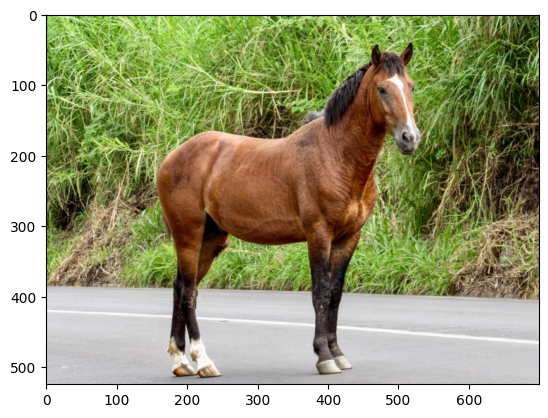

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
모델 출력: 0.0
/content/test_horse.jpg는 horse입니다.
--------------------


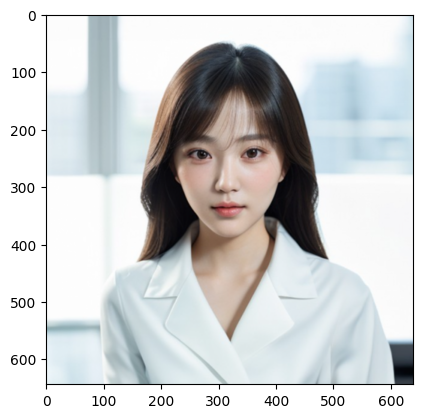

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
모델 출력: 0.0
/content/test_human.png는 horse입니다.
--------------------


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()

    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 horse입니다.")
    print('--------------------')

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # 이미지를 왼쪽 또는 오른쪽으로 40도까지 랜덤하게 기울입니다.
    width_shift_range=0.2, # 이미지를 수평 또는
    height_shift_range=0.2, # 수직으로 20%까지 랜덤하게 이동합니다.
    shear_range=0.2, # 이미지를 20%까지 랜덤하게 기울입니다.
    zoom_range=0.2, # 이미지를 20%까지 랜덤하게 확대합니다.
    horizontal_flip=True,  # 이미지를 수평 또는 수직으로 랜덤하게 뒤집습니다.
    fill_mode='nearest' # 이동하거나 기울인 후에 누락된 픽셀을 근처 픽셀러 채웁니다.
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [19]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 717ms/step - accuracy: 0.5085 - loss: 0.7843 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 669ms/step - accuracy: 0.6200 - loss: 0.6764 - val_accuracy: 0.8789 - val_loss: 0.5640
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 633ms/step - accuracy: 0.6553 - loss: 0.6208 - val_accuracy: 0.5000 - val_loss: 1.3554
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 668ms/step - accuracy: 0.7582 - loss: 0.5240 - val_accuracy: 0.5508 - val_loss: 1.9569
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 693ms/step - accuracy: 0.7898 - loss: 0.4501 - val_accuracy: 0.5781 - val_loss: 2.5827
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.8413 - loss: 0.3585 - val_accuracy: 0.6680 - val_loss: 1.2338
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 629ms/step - accuracy: 0.8804 - loss: 0.3254 - val_accuracy: 0.6953 - val_loss: 1.6823
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 630ms/step - accuracy: 0.8945 - loss: 0.2593 - val_accuracy: 0.796